In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules


In [2]:
with open(r'C:\Users\Admin\OneDrive\Máy tính\Projects\fpgrowth\dataset\groceries.csv') as dataset_file:
  df = pd.read_csv(dataset_file)

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
colnames = ['uid', 'date', 'items']
df = df.set_axis(labels=colnames, axis=1)
df

,uid,date,items
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [5]:
df['items'] = df['items'].transform(lambda x: [x])
df  = df.groupby(['uid', 'date']).sum()['items'].droplevel(level=0).sort_index(ascending=True)
df.head()

date
01-01-2014                                  [soda, brown bread]
01-01-2014             [specialty chocolate, frozen vegetables]
01-01-2014                                [waffles, whole milk]
01-01-2014                           [other vegetables, yogurt]
01-01-2014    [other vegetables, yogurt, Instant food products]
Name: items, dtype: object

In [6]:
def transform_format(df: pd.DataFrame) -> pd.DataFrame:
  enc = TransactionEncoder()
  encoded_df = enc.fit(df).transform(df)
  return pd.DataFrame(data=encoded_df, columns=enc.columns_)

In [7]:
transform_format(df)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
np.arange(0.01, 0.1, 0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [9]:
formatted_df = transform_format(df)
formatted_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [10]:
def get_apriori_run_time_with_min_supports(df: pd.DataFrame, supports: list) -> list:
  run_time_lst = []

  for support in supports:
    start_time = time.time()
    # print(f'start_time = {start_time}')

    apriori(df, min_support=support, use_colnames=False)
    end_time = time.time()
    # print(f'end_time = {end_time}')

    run_time = end_time - start_time
    run_time_lst.append(run_time)

  return run_time_lst


In [11]:
def get_fpgrowth_run_time_with_min_supports(df: pd.DataFrame, min_supports: list) -> list:
  run_time_lst = []

  for min_support in min_supports:
    start_time = time.time()
    # print(f'start_time = {start_time}')
    fpgrowth(df, min_support=min_support, use_colnames=False)
    end_time = time.time()
    # print(f'end_time = {end_time}')
    run_time = end_time - start_time
    run_time_lst.append(run_time)

  return run_time_lst


In [12]:
def compare(apriori_run_time: list, fpgrowth_run_time: list, x_data: list) -> any:
  fig, ax = plt.subplots()
  ax.plot(x_data, apriori_run_time)
  ax.plot(x_data, fpgrowth_run_time)
  # ax.plot(data=[x_data, fpgrowth_run_time])
  ax.legend(['Apriori', 'FP-growth'])
  ax.set_title('Runtime with different minimum support')
  return ax
  

In [13]:
min_supports = np.arange(0.01, 0.2, 0.02)
min_supports

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19])

In [14]:
# N = formatted_df.shape[0]
N = 5000
apriori_run_time = get_apriori_run_time_with_min_supports(formatted_df[:N], min_supports)
apriori_run_time

[0.03700852394104004,
 0.008001565933227539,
 0.0030007362365722656,
 0.002001047134399414,
 0.0019996166229248047,
 0.0020008087158203125,
 0.003000974655151367,
 0.0009996891021728516,
 0.0020003318786621094,
 0.002000570297241211]

In [15]:
fpgrowth_run_time = get_fpgrowth_run_time_with_min_supports(formatted_df[:N], min_supports)
fpgrowth_run_time

[0.027004718780517578,
 0.019004106521606445,
 0.01600360870361328,
 0.01400303840637207,
 0.015002965927124023,
 0.014003753662109375,
 0.013002157211303711,
 0.013003110885620117,
 0.013002634048461914,
 0.013003826141357422]

<AxesSubplot:title={'center':'Runtime with different minimum support'}>

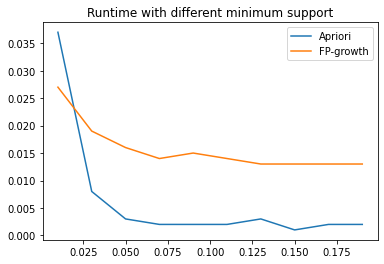

In [16]:
compare(apriori_run_time, fpgrowth_run_time, min_supports)

In [17]:
M = np.arange(2000, 14000, 2000)
M

array([ 2000,  4000,  6000,  8000, 10000, 12000])

In [18]:
def get_apriori_run_time_with_num_of_transactions(df: pd.DataFrame, num_of_transactions: list, min_support: int) -> list:
  run_time_lst = []

  for num in num_of_transactions:
    start_time = time.time()
    frequent_items = apriori(df[:num], min_support=min_support, use_colnames=False)
    end_time = time.time()
    run_time = end_time - start_time
    run_time_lst.append(run_time)

  return run_time_lst

In [19]:
def get_fpgrowth_run_time_with_num_of_transactions(df: pd.DataFrame, num_of_transactions: list, min_support: int) -> list:
  run_time_lst = []

  for num in num_of_transactions:
    start_time = time.time()
    frequent_items = fpgrowth(df[:num], min_support=min_support, use_colnames=False)
    end_time = time.time()
    run_time = end_time - start_time
    run_time_lst.append(run_time)

  return run_time_lst

<AxesSubplot:title={'center':'Runtime with different minimum support'}>

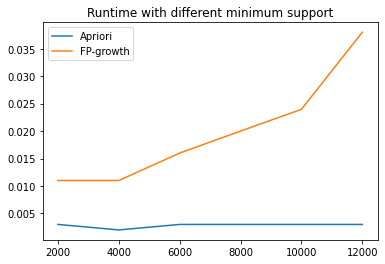

In [20]:
compare(get_apriori_run_time_with_num_of_transactions(formatted_df, M, 0.2), get_fpgrowth_run_time_with_num_of_transactions(formatted_df, M, 0.2), M)

In [21]:
start_time = time.time()
apriori(formatted_df, min_support=0.1)
end_time = time.time()
run_time = end_time - start_time
display(run_time)

0.006002902984619141

In [22]:
start_time = time.time()
fpgrowth(formatted_df, min_support=0.1)
end_time = time.time()
run_time = end_time - start_time
display(run_time)

0.05201101303100586

In [23]:
formatted_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
import mlxtend

In [25]:
mlxtend.__version__

'0.19.0'